GSAPP PLA6113 Wednesday February 17th, 2021<br>
Exploring Urban Data with ML
# Clustering
# K-Means Clustering
__Definition:__<br>
* k-means clustering partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 
* This results in a partitioning of the data space into Voronoi cells. 
* k-Means minimizes within-cluster variances (squared Euclidean distances)

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Simple example
### (1) Load module and create random dataset

In [2]:
from sklearn.datasets import make_blobs

In [3]:
# create dataset (even though we will use only X, which is input features, but it comes with y variable from make_blobs)
X, y = make_blobs(
   n_samples=150, n_features=2, # create (150,2) shape data points - in other words, 150 rows and 2 columns
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

In [4]:
print (X.shape)

(150, 2)


Text(0.5, 1.0, 'Scatter plot - two dimensional data')

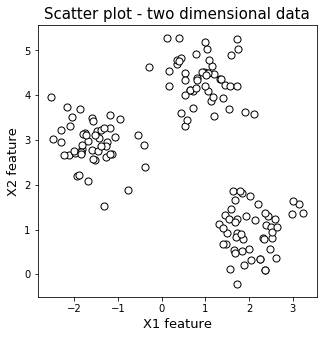

In [5]:
# Plot X (two dimensional data)
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1],
           c='white', marker='o',
           edgecolor='black', s=50)

plt.xlabel('X1 feature', fontsize=13)
plt.ylabel('X2 feature', fontsize=13)
plt.title('Scatter plot - two dimensional data', fontsize=15)

### (2) What is your intuitive 'K' here? Decide an initial K for K-Means clustering

### (3) Load module

You can find various clustering algorithms privded by sklearn here (https://scikit-learn.org/stable/modules/clustering.html)

In [6]:
from sklearn.cluster import KMeans

### (4) Apply K-Means clustering algorithm to the sample dataset

Reference: https://scikit-learn.org/stable/modules/clustering.html#k-means

Syntax:
    
    YOUR_CLUSTERING_MODEL_NAME = KMeans(n_clusters=k, n_init=10, random_state=None)
    
    n_clusters int, default=8
    - The number of clusters to form as well as the number of centroids to generate.
    
    n_init int, default=10
    - Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
    
    random_state int, RandomState instance, default=None
    Determines random number generation for centroid initialization.(for reproducibility)

#### Build your K-Means clustering model

In [7]:
km = KMeans(n_clusters=3, random_state=0)

#### Fit to your data to partition data points into certain groups

In [8]:
group_km = km.fit_predict(X)

In [9]:
print (group_km)

[1 2 2 2 1 2 2 1 0 2 1 0 0 2 2 0 0 1 0 1 2 1 2 2 0 1 1 2 0 1 0 0 0 0 2 1 1
 1 2 2 0 0 2 1 1 1 0 2 0 2 1 2 2 1 1 0 2 1 0 2 0 0 0 0 2 0 2 1 2 2 2 1 1 2
 1 2 2 0 0 2 1 1 2 2 1 1 1 0 0 1 1 2 1 2 1 2 0 0 1 1 1 1 0 1 1 2 0 2 2 2 0
 2 1 0 2 0 2 2 0 0 2 1 2 2 1 1 0 1 0 0 0 0 1 0 0 0 2 0 1 0 2 2 1 1 0 0 0 0
 1 1]


#### Check the centroids of the clusters

In [10]:
print (km.cluster_centers_)

[[-1.5947298   2.92236966]
 [ 2.06521743  0.96137409]
 [ 0.9329651   4.35420712]]


### (5) Plot with clustering result

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Scatter plot - two dimensional data')

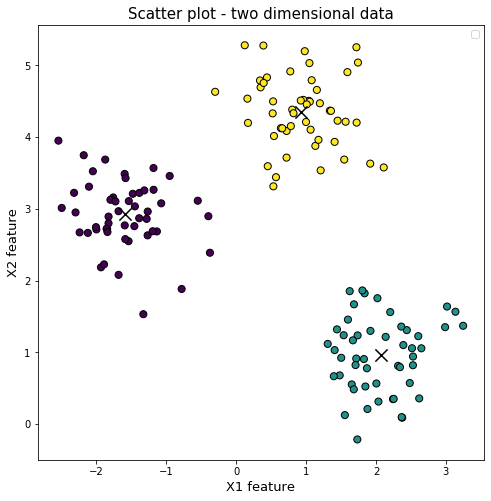

In [14]:
# Plot X (two dimensional data) with different colors based on clustering labels
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1],
            
           marker='o',
           c=group_km,
           edgecolor='black', s=50)
plt.legend()

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
           s=150, marker='x',
           color='k')

plt.xlabel('X1 feature', fontsize=13)
plt.ylabel('X2 feature', fontsize=13)
plt.title('Scatter plot - two dimensional data', fontsize=15)

## Label groups/clusters
### a. Using a colorbar - this is the simplest way but it's tricky to show 'discrete' labels.

Text(0.5, 1.0, 'Scatter plot - two dimensional data')

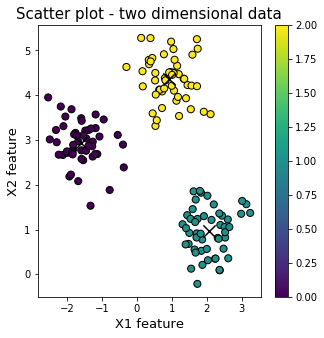

In [16]:
# Plot X (two dimensional data) with different colors based on clustering labels
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1],
           c=group_km, 
           marker='o',
           edgecolor='black', s=50,
           )

plt.colorbar()

# Plot the centroids of the clusters
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
            s=150, marker='x',
            color='k')

plt.xlabel('X1 feature', fontsize=13)
plt.ylabel('X2 feature', fontsize=13)
plt.title('Scatter plot - two dimensional data', fontsize=15)

### b. Create scatter plots iterratively

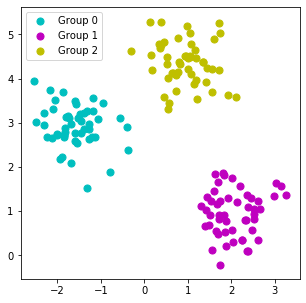

In [17]:
plt.figure(figsize=(5,5))
plt.scatter(X[group_km==0, 0], X[group_km==0, 1], s=50, c='c', label ='Group 0')
plt.scatter(X[group_km==1, 0], X[group_km==1, 1], s=50, c='m', label ='Group 1')
plt.scatter(X[group_km==2, 0], X[group_km==2, 1], s=50, c='y', label ='Group 2')
plt.legend()

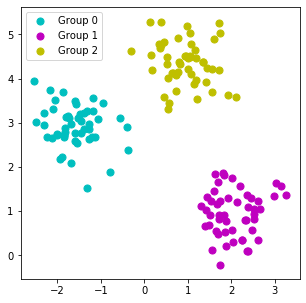

In [18]:
# or you can use for loops

colors = ['c', 'm', 'y'] # you can use any other colors

plt.figure(figsize=(5,5))
for i in [0,1,2]:
    plt.scatter(X[group_km==i, 0], X[group_km==i, 1], s=50, c=colors[i], label ='Group %s'%(i))
plt.legend()

### c) Create dataframe and then create scatter plots iterratively
* You need to firstly create pandas dataframe to store your features and label from the clustering result

In [19]:
df = pd.DataFrame()
df['x1'] = X[:,0]
df['x2'] = X[:,1]
df['label'] = group_km

Text(0.5, 1.0, 'Scatter plot - two dimensional data')

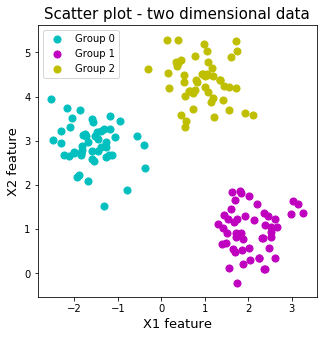

In [20]:
# Plot X (two dimensional data) with different colors based on clustering labels
plt.figure(figsize=(5,5))
plt.scatter(df['x1'][df['label']==0], df['x2'][df['label']==0], 
            c='c', marker='o', s=50, label='Group 0') # scatter plot of group 0
plt.scatter(df['x1'][df['label']==1], df['x2'][df['label']==1], 
            c='m', marker='o', s=50, label='Group 1') # scatter plot of group 1
plt.scatter(df['x1'][df['label']==2], df['x2'][df['label']==2], 
            c='y', marker='o',  s=50, label='Group 2') # scatter plot of group 2

plt.legend()

plt.xlabel('X1 feature', fontsize=13)
plt.ylabel('X2 feature', fontsize=13)
plt.title('Scatter plot - two dimensional data', fontsize=15)

Text(0.5, 1.0, 'Scatter plot - two dimensional data')

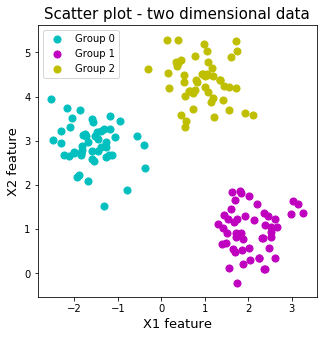

In [21]:
# or you can use for loops here as well

colors = ['c', 'm', 'y'] # if you define your color list above, you don't need to specify again

plt.figure(figsize=(5,5))
for i in [0,1,2]:
    plt.scatter(df['x1'][df['label']==i], df['x2'][df['label']==i], 
            c=colors[i], marker='o', s=50, label='Group %s'%(i))
plt.legend()

plt.xlabel('X1 feature', fontsize=13)
plt.ylabel('X2 feature', fontsize=13)
plt.title('Scatter plot - two dimensional data', fontsize=15)

### d) Using seaborn module (which is a python module for plotting)
* fit_reg parameter should be _False_ - if True, fitted lines will be shown

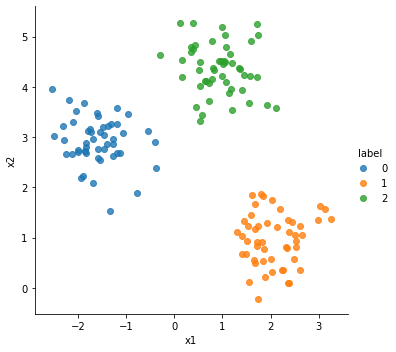

In [22]:
import seaborn as sns
sns.lmplot(data=df, x='x1', y='x2', hue='label', fit_reg=False, legend=True)

### (6) What if we don't have any idea about 'K'? 
#### Let's use the elbow method to determine the optimal number of cluster _k_

In [23]:
wss = []

for i in range(1, 11):
    km = KMeans(
        n_clusters=i,
        n_init=10, random_state=0
    )
    km.fit(X)
    wss.append(km.inertia_)

Text(0.5, 1.0, 'Elbow test')

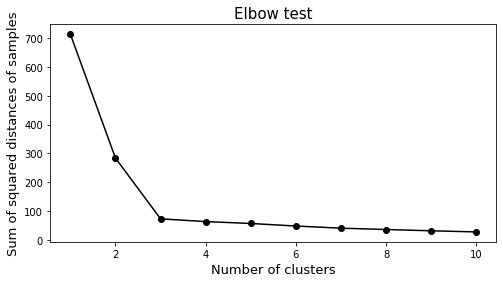

In [24]:
plt.figure(figsize=(8,4))
plt.plot(range(1, 11), wss, marker='o', c='k')

plt.xlabel('Number of clusters', fontsize=13)
plt.ylabel('Sum of squared distances of samples', fontsize=13)
plt.title('Elbow test', fontsize=15)

#### Let's use the Silhoutte method to determine the optimal number of cluster k

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [26]:
silhoutte_avg = []

for i in range(2, 11):
    km = KMeans(
        n_clusters=i,
        n_init=10, random_state=0
    )
    y_km = km.fit_predict(X)
    silhoutte_avg.append(silhouette_score(X, y_km))

In [27]:
print (silhoutte_avg)

[0.5848706144251782, 0.7143417887288687, 0.5768508858868746, 0.44510609118354, 0.30271911266582, 0.3318762696415587, 0.33026054052529685, 0.33944244938228874, 0.35074423261863813]


Text(0.5, 1.0, 'Silhoutte test')

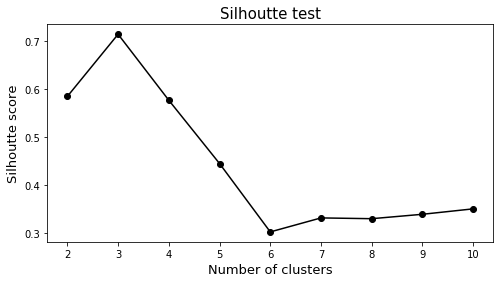

In [28]:
plt.figure(figsize=(8,4))
plt.plot(range(2, 11), silhoutte_avg, marker='o', c='k')

plt.xlabel('Number of clusters', fontsize=13)
plt.ylabel('Silhoutte score', fontsize=13)
plt.title('Silhoutte test', fontsize=15)

# 2. Real world data example
## Neighborhood clustering based on demographic chatacteristics

### 1) Load data

* zipcode_race.csv
* Zipcode (modified by the city government) with racial/ethnic information
* Retrieved from American Community Survey data

In [29]:
data = pd.read_csv('../data/zipcode_race.csv', dtype={'MODZCTA':str})
data.head()

,MODZCTA,White,Black,Asian,Hispanic
0,10001,55.105,3.08,38.945,7.08
1,10002,32.230,8.38,41.460,27.19
2,10003,75.910,5.81,13.480,8.24
3,10004,62.810,1.68,30.450,3.70
4,10005,73.420,2.50,16.950,6.88


### 2) Take input variables

In [30]:
X = data.iloc[:,1:]

### 3) Scale input variables
* It's ok with working on raw variables because four features have the same scale (percentile, 0 to 100).
* But, you will need standardization if scales vary.

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

### 4) Apply K-Means clustering algorithm

In [33]:
km = KMeans(n_clusters=3, random_state=0)

In [34]:
group_km = km.fit_predict(X)

In [35]:
group_km

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0,
       0], dtype=int32)

### 5) Add clustering labels to the initial dataframe and visualize

In [36]:
data['group'] = group_km

In [37]:
zipcode = gpd.read_file('../data/zipcode/MODZCTA_2010.shp')
zipcode.head()

,MODZCTA,label,geometry
0,10001,"10001, 10118","POLYGON ((987646.000 210360.000, 987522.000 21..."
1,10002,10002,"POLYGON ((985342.000 197658.000, 985336.000 19..."
2,10003,10003,"POLYGON ((987412.000 202684.000, 987400.000 20..."
3,10004,10004,"MULTIPOLYGON (((982030.000 197212.000, 981958...."
4,10005,10005,"POLYGON ((982126.000 195468.000, 982080.000 19..."


In [38]:
result = pd.merge(zipcode, data, on='MODZCTA', how='left')

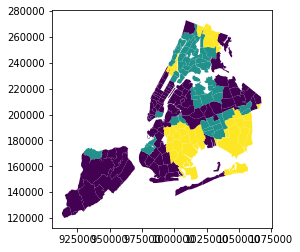

In [39]:
result.plot(column='group')

### 6) Identify the optimized number of clustered groups

Text(0.5, 1.0, 'Elbow test')

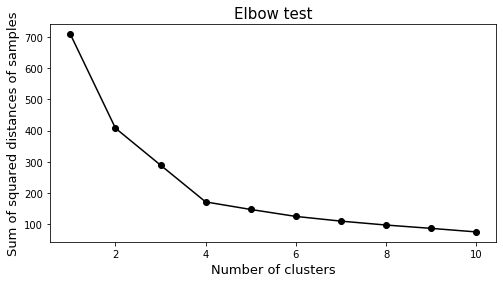

In [40]:
# Use for loops 
# Create an empty list to store total within sum of square values of each loop
wss = []

for i in range(1, 11):
    km = KMeans(
        n_clusters=i,
        n_init=10, random_state=0
    )
    km.fit(X_scaled)
    wss.append(km.inertia_) # calculate sum of squared distances of samples to their closest cluster center and append to the list

# plot the elbow test results
plt.figure(figsize=(8,4))
plt.plot(range(1, 11), wss, marker='o', c='k')

plt.xlabel('Number of clusters', fontsize=13)
plt.ylabel('Sum of squared distances of samples', fontsize=13)
plt.title('Elbow test', fontsize=15)

Text(0.5, 1.0, 'Silhoutte test')

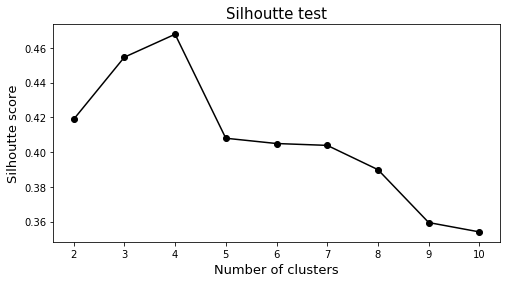

In [41]:
# Use for loops 
# Create an empty list to store a Silhoutte score of each loop
silhoutte_avg = []

for i in range(2, 11): # Make sure silhoutte score can be calculated with at least 2 clusters
    km = KMeans(
        n_clusters=i,
        n_init=10, random_state=0
    )
    y_km = km.fit_predict(X_scaled)
    silhoutte_avg.append(silhouette_score(X_scaled, y_km)) # calculate a Silhoutte score and append to the list
    
# plot the Silhoutte test results
plt.figure(figsize=(8,4))
plt.plot(range(2, 11), silhoutte_avg, marker='o', c='k')

plt.xlabel('Number of clusters', fontsize=13)
plt.ylabel('Silhoutte score', fontsize=13)
plt.title('Silhoutte test', fontsize=15)

### 7) Try clustering again based on the optimal K

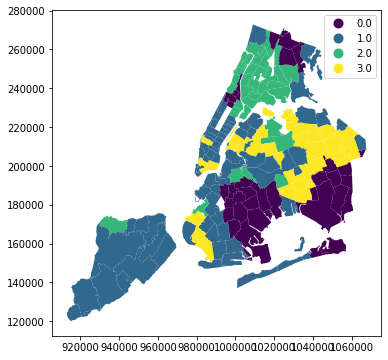

In [42]:
km = KMeans(n_clusters=4, random_state=0)
group_km = km.fit_predict(X)

data['group'] = group_km

result = pd.merge(zipcode, data, on='MODZCTA', how='left')


ax = result.plot(column='group', legend=True, categorical=True, cmap='viridis',figsize=(6,6))

In [43]:
result[['White', 'Black', 'Asian', 'Hispanic', 'group']].groupby('group').mean()

,White,Black,Asian,Hispanic
group,,,,
0.0,19.300857,63.164714,4.859000,18.357571
1.0,71.435043,6.154307,13.780411,15.995931
2.0,27.720303,24.895455,5.899697,60.494545
3.0,36.442969,8.212813,37.882344,23.045625
